# Capstone Project 1 
# House price prediction, using population, GDP per capita, median household income, stock market, and unemployment rate
Zillow offer a very rich public dataset of house price by state, metropolitan areas, and zip codes. Despite its thoroughness in categorizing America's house sale and rental prices based upon bedrooms, tier, and other factors, I believe a combination of some other factor, such as the ones I am using for this project: population (both state and metro level), GDP per capita (both state and metro level), median house income (only state level), stock market, and unemployment rate (both state and metro level)
data, would shed lights on how sale and rental price will evolve into the future. 

This project utilizes the following dataset:
+ Zillow economics dataset (https://www.kaggle.com/zillow/zecon)
+ State and metro GDP per capita, from Bureau of Economic Analysis (https://www.bea.gov/data/gdp/gdp-state)
+ State and metro population, from Census Bureau (https://www.census.gov/)
+ Unenployment rate, from Bureau of Labor Statistics (https://www.bls.gov/)
+ Median household income, from Census Bureau (https://www.census.gov/)



## 1. Project Scope
### 1.1 State Level
This project starts from state level. After a quick review of the zillow data by state, the project will focus on two states that are very interesting to the author: California and Texas. California is #1 by population and GDP in the U.S., and Texas is #2, and also where the author lives in. 

### 1.2 Metropolitan Level
What is more interesting is that for tech nerds, Silicon Valley is THE magnet. However with the skyrocking house price in bay area, more companies are starting to look for an althernative, and Austin, TX is becoming increasingly popular. Austin, which many call 'Silicon Hill' nowadays, share a lot of similarities with Silicon Valley: young population with great higher education, great investment environment, etc. Are the real state markets for these two areas also share some similarities? This is another question this project will try to answer. Therefore, the second level of the project is metro level. 

### 1.3 Zip Code Level
Finally, if time permits, the author will also try to focus down to individual zip codes of the city that author lives in: Houston, TX. Just like any other metropolitan areas in the U.S., Houston contains lots of varations. And when those variations exhibit in the real state market, interesting phenomena appear.

## 2. Data Wrangling
### 2.1 Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.style.use('ggplot')
import seaborn as sns
import plotly.plotly as py
import plotly
import plotly.figure_factory as ff

### 2.1.1 State Data Exploratory Analysis

In [2]:
data_directory = 'data_zillow_econ/State_time_series.csv'
df_state = pd.read_csv(data_directory, parse_dates=True, index_col='Date')

In [54]:
df_state.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13212 entries, 1996-04-30 to 2017-12-31
Data columns (total 81 columns):
RegionName                                                       13212 non-null object
DaysOnZillow_AllHomes                                            4845 non-null float64
InventorySeasonallyAdjusted_AllHomes                             4896 non-null float64
InventoryRaw_AllHomes                                            4896 non-null float64
MedianListingPricePerSqft_1Bedroom                               3586 non-null float64
MedianListingPricePerSqft_2Bedroom                               4534 non-null float64
MedianListingPricePerSqft_3Bedroom                               4607 non-null float64
MedianListingPricePerSqft_4Bedroom                               4677 non-null float64
MedianListingPricePerSqft_5BedroomOrMore                         4569 non-null float64
MedianListingPricePerSqft_AllHomes                               4674 non-null float64
Medi

There are a lot of NaN in the dataframe. Subsets of data are created in order to remove NaNs

In [3]:
df_state['year'] = df_state.index.year
df_state_year = df_state.groupby(['RegionName','year']).mean()

In [4]:
# for most states, days on market data is only available from 2010
# df_state_year_reduced only contains data in year 2010 and 2017, and the percentage change from 2010 to 2017

df_state_year_reduced = df_state_year[(df_state_year.index.get_level_values(1)==2010) | (df_state_year.index.get_level_values(1)==2017)]

df_state_year_reduced = df_state_year_reduced.unstack(level=1)


In [13]:
df_state_year_reduced

DaysOnZillow_AllHomes              \
year                                2010        2017   
RegionName                                             
Alabama                       141.177083  103.727273   
Alaska                        109.989583   94.011364   
Arizona                       107.125000   72.045455   
Arkansas                      123.375000   97.784091   
California                     96.625000   62.386364   
Colorado                      118.062500   60.045455   
Connecticut                   139.041667  113.727273   
Delaware                      132.187500  106.272727   
DistrictofColumbia            112.583333   62.102273   
Florida                       134.416667   98.363636   
Georgia                       131.979167   82.590909   
Hawaii                        112.000000   84.068182   
Idaho                         124.979167   71.545455   
Illinois                      148.500000   99.295455   
Indiana                       122.791667   80.613636   
Iowa                          119.375000   83.693182   
Kansas                        104.520833   69.818182   
Kentucky                      119.093750   78.272727   
Louisiana                     118.531250   88.636364   
Maine                         141.083333  113.931818   
Maryland                      149.937500  100.136364   
Massachusetts                 128.677083   83.909091   
Michigan                      121.229167   82.181818   
Minnesota                     136.625000   78.454545   
Mississippi                   122.239583   97.772727   
Missouri                      113.083333   76.159091   
Montana                       125.395833   92.659091   
Nebraska                      118.760417   65.750000   
Nevada                        104.645833   67.477273   
NewHampshire                  121.822917   92.045455   
NewJersey                     163.968750  124.750000   
NewMexico                     127.583333   94.840909   
NewYork                       170.510417  136.659091   
NorthCarolina                 143.708333   85.204545   
NorthDakota                   121.927083   97.670455   
Ohio                          125.875000   80.909091   
Oklahoma                      116.093750   91.590909   
Oregon                        128.770833   72.250000   
Pennsylvania                  130.333333   97.272727   
RhodeIsland                   140.197917   97.295455   
SouthCarolina                 146.875000   95.215909   
SouthDakota                          NaN         NaN   
Tennessee                     130.166667   82.386364   
Texas                         112.479167   72.636364   
UnitedStates                  123.291667   84.022727   
Utah                          117.343750   68.284091   
Vermont                       175.479167  153.602273   
Virginia                      112.187500   83.147727   
Washington                    120.479167   60.500000   
WestVirginia                  148.333333  114.681818   
Wisconsin                     143.895833   89.227273   
Wyoming                        99.034722   91.545455   

                   InventorySeasonallyAdjusted_AllHomes                 \
year                                               2010           2017   
RegionName                                                               
Alabama                                    34912.333333   27350.500000   
Alaska                                      3347.000000    3311.333333   
Arizona                                    55471.250000   29856.416667   
Arkansas                                   18543.500000   16330.416667   
California                                140380.166667   61571.416667   
Colorado                                   48050.083333   20065.500000   
Connecticut                                24886.166667   19637.583333   
Delaware                                    7460.500000    6127.000000   
DistrictofColumbia                          2156.083333    1271.333333   
Florida                                   246163.1

In [ ]:
df_state_year_reduced['Percentage_change'] = abs(((df_state_year_reduced[2017]-df_state_year_reduced[2010])/df_state_year_reduced[2010]) * 100)

df_state_year_reduced = df_state_year_reduced.unstack(level=1)

df_state_year_reduced = df_state_year_reduced.stack(level=0)

df_state_year_reduced = df_state_year_reduced.unstack(level=1)

In [342]:
df_temp = df_state_year_reduced.drop('DistrictofColumbia')
df_temp = df_temp.drop('UnitedStates')

df_temp = df_temp.reset_index()

In [343]:
#Set plotly parameters
plotly.tools.set_credentials_file(username='cliffrunner', api_key='FiFmMQia2FzBSJDUT3hC')


scl = [[0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1, 'rgb(84,39,143)']]

for i in range(1,len(df_temp.columns)):
    df_temp.iloc[:,i] = df_temp.iloc[:,i].astype(str)
    
df_temp['code'] = ['AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA',
                   'HI','ID','IL','IN','IA','KS','KY','LA','ME','MD',
                   'MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ',
                   'NM','NY','NC','ND','OH','OK','OR','PA','RI','SC',
                   'SD','TN','TX','UT','VT','VA','WA','WV','WI','WY']

In [245]:
# map view of days on zillow reduction from 2010 to 2017
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df_temp['code'],
        z = df_temp['DaysOnZillow_AllHomes']['Percentage_change'],
        locationmode = 'USA-states',
        text = df_temp['RegionName'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Days reduction by percentage")
        ) ]

layout = dict(
        title = 'Days on Zillow reduction by percentage <br> from 2010 to 2017 <br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

In [247]:
# map view of ome inventory reducton by percentage from 2010 to 2017

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df_temp['code'],
        z = df_temp['InventorySeasonallyAdjusted_AllHomes']['Percentage_change'],
        locationmode = 'USA-states',
        text = df_temp['RegionName'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Inventory Reduction")
        ) ]

layout = dict(
        title = 'Home inventory reducton by percentage <br> from 2010 to 2017<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

In [295]:
# Home value increase from 2010 to 2017
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df_temp['code'],
        z = df_temp['ZHVIPerSqft_AllHomes']['Percentage_change'],
        locationmode = 'USA-states',
        text = df_temp['RegionName'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Home value increase per sqft by percentage")
        ) ]

layout = dict(
        title = 'Home value increase per sqft by percentage <br> from 2010 to 2017<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

In [347]:
# Rental price increase from 2010 to 2017
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df_temp['code'],
        z = df_temp['ZriPerSqft_AllHomes']['Percentage_change'],
        locationmode = 'USA-states',
        text = df_temp['RegionName'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Rental price increase per sqft by percentage")
        ) ]

layout = dict(
        title = 'Rental price increase per sqft by percentage <br> from 2010 to 2017<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

In [359]:
df_temp = df_temp.set_index('RegionName')


KeyError: 'RegionName'

In [360]:
df_temp

DaysOnZillow_AllHomes                                          \
year                           2010                2017   Percentage_change   
RegionName                                                                    
Alabama          141.17708333333334  103.72727272727273   26.52683404546461   
Alaska           109.98958333333333   94.01136363636364   14.52702993568605   
Arizona                     107.125   72.04545454545455   32.74636681871221   
Arkansas                    123.375    97.7840909090909  20.742378189186702   
California                   96.625   62.38636363636363   35.43455251087851   
Colorado                   118.0625   60.04545454545455   49.14095962269599   
Connecticut      139.04166666666666  113.72727272727273  18.206336666030992   
Delaware                   132.1875  106.27272727272727  19.604556200300884   
Florida          134.41666666666666   98.36363636363636   26.82184523474046   
Georgia          131.97916666666666    82.5909090909091  37.421252780368796   
Hawaii                        112.0   84.06818181818181   24.93912337662338   
Idaho            124.97916666666667   71.54545454545455  42.754095379532956   
Illinois                      148.5   99.29545454545455   33.13437404346495   
Indiana          122.79166666666667   80.61363636363636    34.3492611901163   
Iowa                        119.375   83.69318181818181  29.890528319847697   
Kansas           104.52083333333333   69.81818181818181   33.20165981118742   
Kentucky                  119.09375   78.27272727272727   34.27637699482361   
Louisiana                 118.53125   88.63636363636364   25.22110107135153   
Maine            141.08333333333334  113.93181818181819  19.245019599420075   
Maryland                   149.9375  100.13636363636364   33.21459699117056   
Massachusetts    128.67708333333334    83.9090909090909   34.79095986988807   
Michigan         121.22916666666667   82.18181818181819  32.209533034417035   
Minnesota                   136.625   78.45454545454545   42.57672793811861   
Mississippi      122.23958333333333   97.77272727272727   20.01549366696363   
Missouri         113.08333333333333    76.1590909090909   32.65224090574127   
Montana          125.39583333333333    92.6590909090909   26.10672265099911   
Nebraska         118.76041666666667               65.75   44.63643540040347   
Nevada           104.64583333333333   67.47727272727273   35.51843338823231   
NewHampshire     121.82291666666667   92.04545454545455   24.44323525982355   
NewJersey                 163.96875              124.75  23.918429578806936   
NewMexico        127.58333333333333    94.8409090909091    25.6635591710706   
NewYork          170.51041666666666   136.6590909090909   19.85293709284179   
NorthCarolina    143.70833333333334   85.20454545454545   40.71008724531485   
NorthDakota      121.92708333333333   97.67045454545455  19.894373034056926   
Ohio                        125.875    80.9090909090909   35.72266859257922   
Oklahoma                  116.09375    91.5909090909091  21.106080998409393   
Oregon           128.77083333333334               72.25  43.892574017149336   
Pennsylvania     130.33333333333334   97.27272727272727   25.36619390839341   
RhodeIsland      140.19791666666666   97.29545454545455  30.601354956804837   
SouthCarolina               146.875    95.2159090909091  35.172147001934235   
SouthDakota                     nan                 nan                 nan   
Tennessee        130.16666666666666   82.38636363636364   36.70701897334419   
Texas            112.47916666666667   72.63636363636364   35.42238461667986   
Utah                      117.34375    68.2840909090909   41.80849776056167   
Vermont          175.47916666666666  153.60227272727272  12.466946564061605   
Virginia                   112.1875   83.14772727272727   25.88503418586985   
Washington       120.47916666666667                60.5   49.78384921321114   
WestVirginia     148.33333333333334  114.68181818181819   22.686

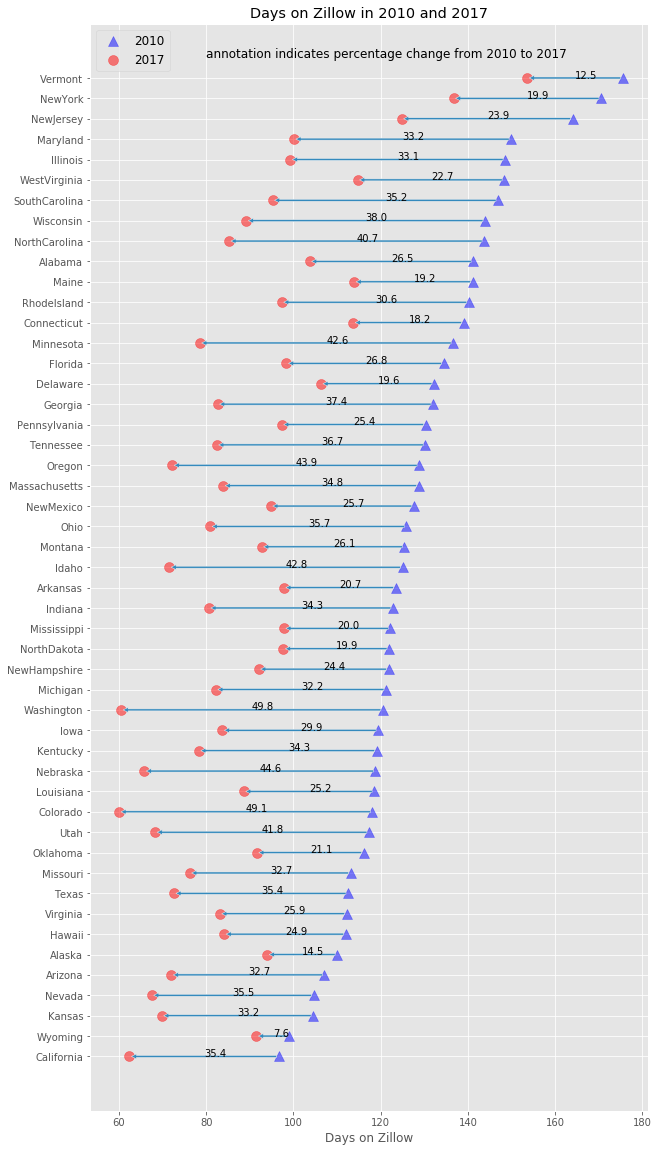

In [442]:
df_1017 = df_temp['DaysOnZillow_AllHomes'].astype(float).dropna().round(1).sort_values(by=2010, ascending=True)

plt.figure(figsize=(10,20))

plt.scatter(df_1017[2010], df_1017.index, c='b', alpha=0.5, marker='^', s=100)
plt.scatter(df_1017[2017], df_1017.index, c='r', alpha=0.5, marker='o', s=100)

for index,value in df_1017.iterrows():
    plt.annotate("",
                 xy=(value[1],index),
                 xytext=(value[0],index),
                 arrowprops=dict(arrowstyle='simple', connectionstyle="arc3"))
    plt.annotate(str(value[2]), 
                 xy=(value[1],index),
                 xytext=((value[0]+value[1])/2,index))

plt.legend(['2010','2017'], loc='upper left', fontsize='large')
plt.annotate('annotation indicates percentage change from 2010 to 2017', 
             xy=(80,49),
             fontsize=12,
             color='Black')
plt.xlabel('Days on Zillow')
plt.title('Days on Zillow in 2010 and 2017')
plt.show()



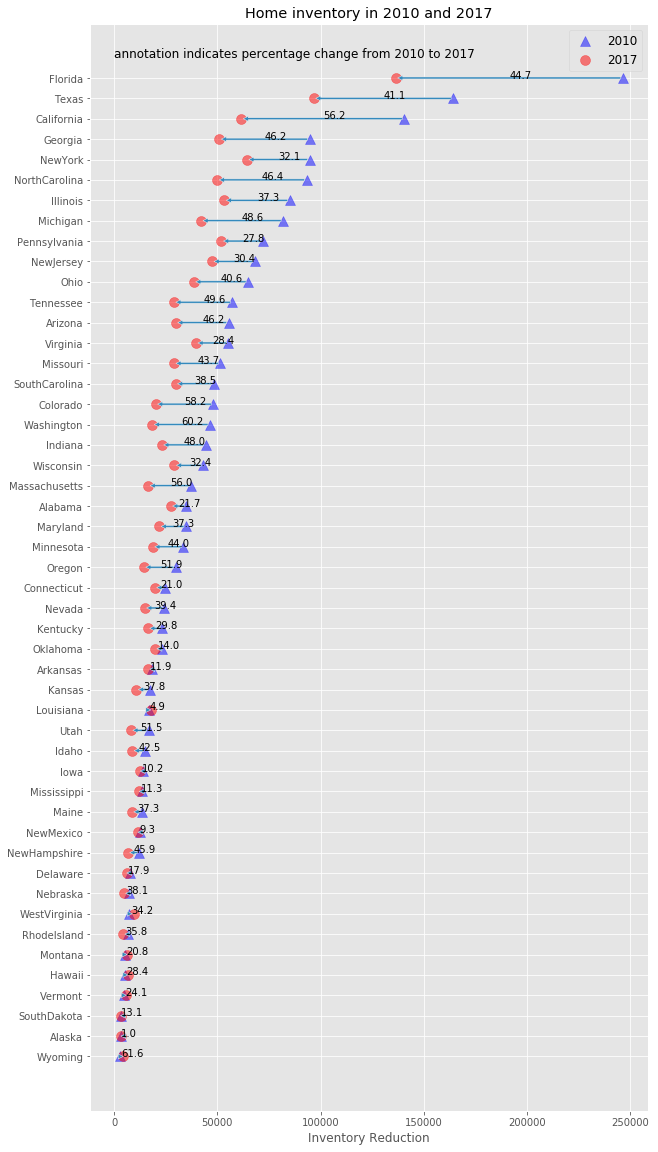

In [451]:
df_1017 = df_temp['InventorySeasonallyAdjusted_AllHomes'].astype(float).dropna().round(1).sort_values(by=2010, ascending=True)

df_1017 = df_1017.drop('NorthDakota')

plt.figure(figsize=(10,20))

plt.scatter(df_1017[2010], df_1017.index, c='b', alpha=0.5, marker='^', s=100)
plt.scatter(df_1017[2017], df_1017.index, c='r', alpha=0.5, marker='o', s=100)

for index,value in df_1017.iterrows():
    plt.annotate("",
                 xy=(value[1],index),
                 xytext=(value[0],index),
                 arrowprops=dict(arrowstyle='simple', connectionstyle="arc3"))
    plt.annotate(str(value[2]), 
                 xy=(value[1],index),
                 xytext=((value[0]+value[1])/2,index))

plt.legend(['2010','2017'], loc='upper right', fontsize='large')
plt.annotate('annotation indicates percentage change from 2010 to 2017', 
             xy=(80,49),
             fontsize=12,
             color='Black')
plt.xlabel('Inventory Reduction')
plt.title('Home inventory in 2010 and 2017')
plt.show()

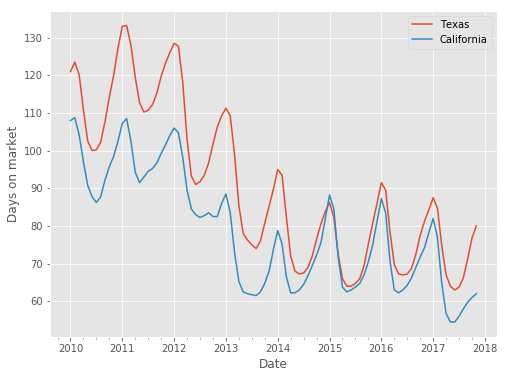

In [50]:
df_texas = df_state[df_state['RegionName']=='Texas']
df_cal = df_state[df_state['RegionName']=='California']
df_texas['DaysOnZillow_AllHomes'].plot(figsize=(8,6))
df_cal['DaysOnZillow_AllHomes'].plot(figsize=(8,6))
plt.ylabel('Days on market')
plt.legend(['Texas','California'])
plt.show()

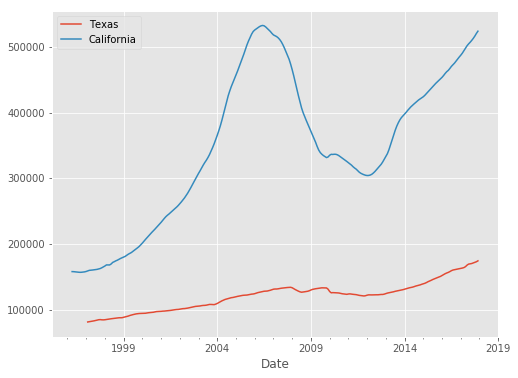

In [40]:
df_texas['ZHVI_MiddleTier'].plot(figsize=(8,6))
df_cal['ZHVI_MiddleTier'].plot(figsize=(8,6))
plt.legend(['Texas','California'])
plt.show()

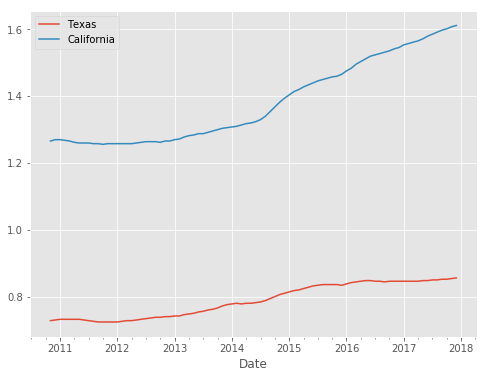

In [41]:
df_texas['ZriPerSqft_AllHomes'].plot(figsize=(8,6))
df_cal['ZriPerSqft_AllHomes'].plot(figsize=(8,6))
plt.legend(['Texas','California'])
plt.show()

In [17]:
data_directory = 'data_zillow_econ/Zip_time_series.csv'
df = pd.read_csv(data_directory, parse_dates=True, index_col='Date')
df.shape

(4383885, 75)

## 1. Data wrangling
This section aims to check data quality, and offers a first pass to correct data that are apparently wrong.The focus for this project is to make house price prediction for the western houston area. Therefore, only certain zip codes are selected.The zip codes selected for the project are: 
+ Saterlite cities:
 + Katy: [77493, 77494]
 + Sugarland: [77478, 77479, 77487, 77496, 77498]
 + Pearland: [77047, 77089, 77581, 77584, 77588]
+ Houston:
 + West University: [77005]
 + Rice Military: [77007]
 + Memorial: [77024]
 + Medical: [77025, 77054, 77030, 77004]
 + Heights: [77007, 77008, 77009]

In [18]:
# only certain zip codes are included in the analysis
katy = [77493, 77494]
sugarland = [77478, 77479, 77498]
pearland = [77047, 77089, 77581, 77584]
west_univ = [77005]
rice_mil = [77007]
memorial = [77024]
medical = [77025, 77054, 77030, 77004]
heights = [77007, 77008, 77009]
zip_codes = {'katy':katy,
             'sugarland':sugarland,
            'pearland':pearland,
            'west_univ':west_univ,
            'rice_military':rice_mil,
            'memorial':memorial,
            'medical':medical,
            'heights':heights}

# extract data from df to df_houston
df_houston = []
ct = 0
for key, zip_code in zip_codes.items():
    for z in zip_code:
        df_temp = df[df['RegionName']==z]
        print('zip code is: '+str(z)+', and the data shape is: '+str(df_temp.shape))
        df_temp['Region'] = key # add a region column to store the region names
        df_houston.append(df_temp)
        ct += 1
df_houston = pd.concat(df_houston, join='outer', axis = 0)
df_houston.rename(columns={'RegionName':'zip_code'}, inplace=True)
print('df_houston shape is: '+str(df_houston.shape))

zip code is: 77493, and the data shape is: (96, 75)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


zip code is: 77494, and the data shape is: (261, 75)
zip code is: 77478, and the data shape is: (96, 75)
zip code is: 77479, and the data shape is: (96, 75)
zip code is: 77498, and the data shape is: (96, 75)
zip code is: 77047, and the data shape is: (261, 75)
zip code is: 77089, and the data shape is: (96, 75)
zip code is: 77581, and the data shape is: (261, 75)
zip code is: 77584, and the data shape is: (261, 75)
zip code is: 77005, and the data shape is: (261, 75)
zip code is: 77007, and the data shape is: (261, 75)
zip code is: 77024, and the data shape is: (96, 75)
zip code is: 77025, and the data shape is: (261, 75)
zip code is: 77054, and the data shape is: (261, 75)
zip code is: 77030, and the data shape is: (251, 75)
zip code is: 77004, and the data shape is: (261, 75)
zip code is: 77007, and the data shape is: (261, 75)
zip code is: 77008, and the data shape is: (261, 75)
zip code is: 77009, and the data shape is: (261, 75)
df_houston shape is: (3959, 76)


In [19]:
# check the number of none-nan values in df_houston
df_houston.count()

zip_code                                                         3959
InventorySeasonallyAdjusted_AllHomes                             1728
InventoryRaw_AllHomes                                            1728
MedianListingPricePerSqft_1Bedroom                                 16
MedianListingPricePerSqft_2Bedroom                                381
MedianListingPricePerSqft_3Bedroom                               1138
MedianListingPricePerSqft_4Bedroom                               1063
MedianListingPricePerSqft_5BedroomOrMore                          318
MedianListingPricePerSqft_AllHomes                               1580
MedianListingPricePerSqft_CondoCoop                               260
MedianListingPricePerSqft_DuplexTriplex                             0
MedianListingPricePerSqft_SingleFamilyResidence                  1562
MedianListingPrice_1Bedroom                                        12
MedianListingPrice_2Bedroom                                       421
MedianListingPrice_3

In [37]:
# averge values categorized by region and date        
df_temp = df_houston.groupby(['Region','Date']).mean()
df_temp.tail(20)

zip_code  InventorySeasonallyAdjusted_AllHomes  \
Region    Date                                                         
west_univ 2016-05-31   77005.0                                 139.0   
          2016-06-30   77005.0                                 146.0   
          2016-07-31   77005.0                                 151.0   
          2016-08-31   77005.0                                 153.0   
          2016-09-30   77005.0                                 153.0   
          2016-10-31   77005.0                                 151.0   
          2016-11-30   77005.0                                 145.0   
          2016-12-31   77005.0                                 138.0   
          2017-01-31   77005.0                                 131.0   
          2017-02-28   77005.0                                 124.0   
          2017-03-31   77005.0                                 122.0   
          2017-04-30   77005.0                                 129.0   
          2017-05-31   77005.0                                 136.0   
          2017-06-30   77005.0                                 139.0   
          2017-07-31   77005.0                                 145.0   
          2017-08-31   77005.0                                 151.0   
          2017-09-30   77005.0                                 148.0   
          2017-10-31   77005.0                                 138.0   
          2017-11-30   77005.0                                 131.0   
          2017-12-31   77005.0                                 129.0   

                      InventoryRaw_AllHomes  \
Region    Date                                
west_univ 2016-05-31                  154.0   
          2016-06-30                  166.0   
          2016-07-31                  162.0   
          2016-08-31                  159.0   
          2016-09-30                  154.0   
          2016-10-31                  148.0   
          2016-11-30                  139.0   
          2016-12-31                  112.0   
          2017-01-31                  107.0   
          2017-02-28                  107.0   
          2017-03-31                  126.0   
          2017-04-30                  143.0   
          2017-05-31                  158.0   
          2017-06-30                  154.0   
          2017-07-31                  154.0   
          2017-08-31                  162.0   
          2017-09-30                  150.0   
          2017-10-31                  134.0   
          2017-11-30                  121.0   
          2017-12-31                  106.0   

                      MedianListingPricePerSqft_1Bedroom  \
Region    Date                                             
west_univ 2016-05-31                                 NaN   
          2016-06-30                                 NaN   
          2016-07-31                                 NaN   
          2016-08-31                                 NaN   
          2016-09-30                                 NaN   
          2016-10-31                                 NaN   
          2016-11-30                                 NaN   
          2016-12-31                                 NaN   
          2017-01-31                                 NaN   
          2017-02-28                                 NaN   
          2017-03-31                                 NaN   
          2017-04-30                                 NaN   
          2017-05-31                                 NaN   
          2017-06-30                                 NaN   
          2017-07-31                                 NaN   
          2017-08-31                                 NaN   
          2017-09-30                                 NaN   
          2017-10-31                                 NaN   
          2017-11-30                                 NaN   
          2017-12-31                                 NaN   

                      MedianListingPricePerSqft_2Bedroom  \
Region    Date       

In [38]:
df_temp = df_temp.unstack(level=0)

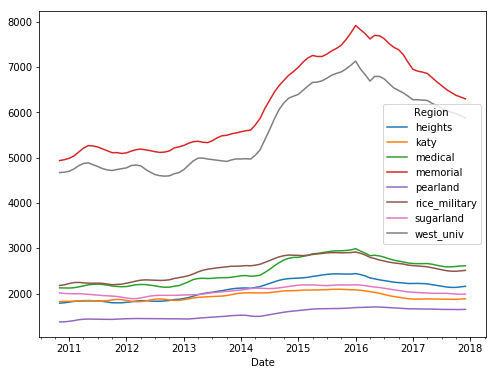

In [54]:
df_temp['Zri_SingleFamilyResidenceRental'].plot(figsize=(8,6))
plt.show()

# Try again: Data by Cities
zip code data (for houston area) only contains data from 2010. Will see if data by states will give more insight into the data story.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_directory = 'data_zillow_econ/city_time_series.csv'
df_city = pd.read_csv(data_directory, parse_dates=True, index_col='Date')
df_city.shape

(3762566, 80)

In [23]:
df_city.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3762566 entries, 1996-04-30 to 2017-12-31
Data columns (total 80 columns):
RegionName                                                       object
InventorySeasonallyAdjusted_AllHomes                             float64
InventoryRaw_AllHomes                                            float64
MedianListingPricePerSqft_1Bedroom                               float64
MedianListingPricePerSqft_2Bedroom                               float64
MedianListingPricePerSqft_3Bedroom                               float64
MedianListingPricePerSqft_4Bedroom                               float64
MedianListingPricePerSqft_5BedroomOrMore                         float64
MedianListingPricePerSqft_AllHomes                               float64
MedianListingPricePerSqft_CondoCoop                              float64
MedianListingPricePerSqft_DuplexTriplex                          float64
MedianListingPricePerSqft_SingleFamilyResidence                  float

In [3]:
data_directory = 'data_zillow_econ/cities_crosswalk.csv'
df_citycrosswalk = pd.read_csv(data_directory)

In [4]:
df_city = df_city.reset_index()
df_city = pd.merge(df_city, df_citycrosswalk, how='left', left_on='RegionName', right_on='Unique_City_ID')

In [5]:
df_city = df_city.set_index('Date')

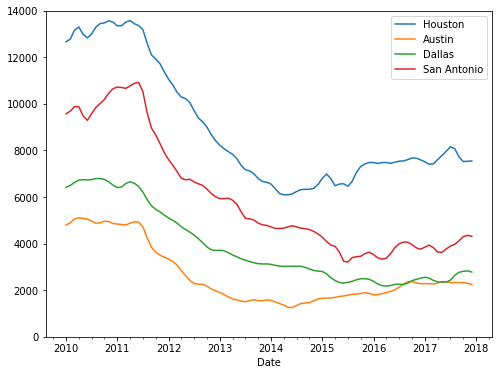

In [6]:
df_Houston = df_city[(df_city.City=='Houston') & (df_city.State=='TX')]
df_Austin = df_city[(df_city.City=='Austin') & (df_city.State=='TX')]
df_Dallas = df_city[(df_city.City=='Dallas') & (df_city.State=='TX')]
df_SanAnt = df_city[(df_city.City=='San Antonio') & (df_city.State=='TX')]
df_Houston['InventorySeasonallyAdjusted_AllHomes'].plot(figsize=(8,6))
df_Austin['InventorySeasonallyAdjusted_AllHomes'].plot(figsize=(8,6))
df_Dallas['InventorySeasonallyAdjusted_AllHomes'].plot(figsize=(8,6))
df_SanAnt['InventorySeasonallyAdjusted_AllHomes'].plot(figsize=(8,6))
plt.legend(['Houston','Austin','Dallas','San Antonio'])
plt.ylim((0,14000))
plt.show()

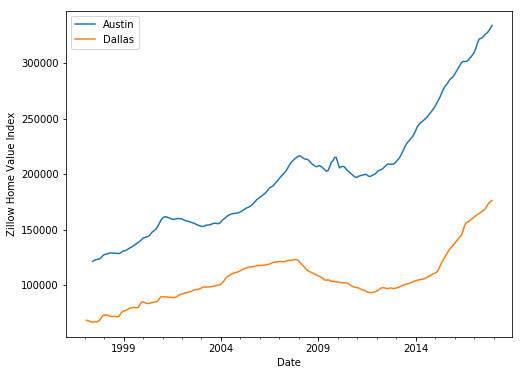

In [7]:
#df_Houston['ZHVI_MiddleTier'].plot(figsize=(8,6))
df_Austin['ZHVI_MiddleTier'].plot(figsize=(8,6))
df_Dallas['ZHVI_MiddleTier'].plot(figsize=(8,6))
plt.legend(['Austin','Dallas'])
plt.ylabel('Zillow Home Value Index')
plt.show()

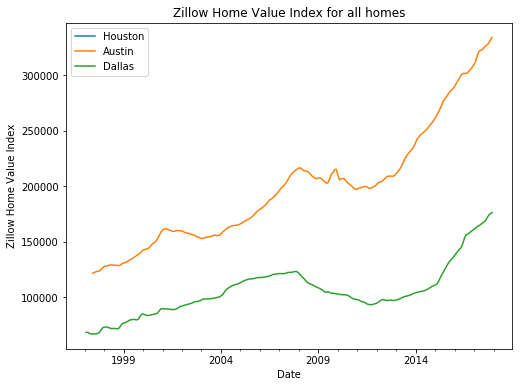

In [8]:
df_Houston['ZHVI_AllHomes'].plot(figsize=(8,6))
df_Austin['ZHVI_AllHomes'].plot(figsize=(8,6))
df_Dallas['ZHVI_AllHomes'].plot(figsize=(8,6))
plt.legend(['Houston','Austin','Dallas'])
plt.ylabel('Zillow Home Value Index')
plt.title('Zillow Home Value Index for all homes')
plt.show()

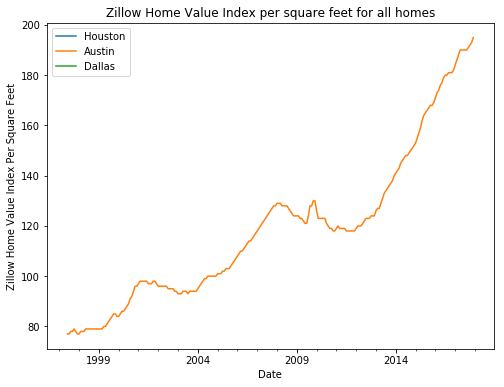

In [9]:
df_Houston['ZHVIPerSqft_AllHomes'].plot(figsize=(8,6))
df_Austin['ZHVIPerSqft_AllHomes'].plot(figsize=(8,6))
df_Dallas['ZHVIPerSqft_AllHomes'].plot(figsize=(8,6))
plt.legend(['Houston','Austin','Dallas'])
plt.ylabel('Zillow Home Value Index Per Square Feet')
plt.title('Zillow Home Value Index per square feet for all homes')
plt.show()

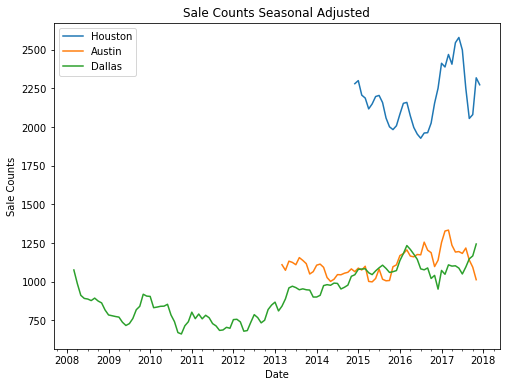

In [10]:
df_Houston['Sale_Counts_Seas_Adj'].plot(figsize=(8,6))
df_Austin['Sale_Counts_Seas_Adj'].plot(figsize=(8,6))
df_Dallas['Sale_Counts_Seas_Adj'].plot(figsize=(8,6))
plt.legend(['Houston','Austin','Dallas'])
plt.ylabel('Sale Counts')
plt.title('Sale Counts Seasonal Adjusted')
plt.show()

# Macro parameters affecting house price
+ Population (by metro and state)
+ Median household income (by state)
+ GDP per capita by metropolitan area (by metro and state)
+ Unemployment rate (by metro)
+ Stock price
+ Oil price (for Houston)

# Capstone 1 Machine Learning Ideas
+ Timeseries forecasting using classical methods and machine learning
  + to learn facebook prophet use this: https://facebook.github.io/prophet/docs/quick_start.html#python-api
  + Time series analysis using python stat tools: https://www.slideshare.net/wesm/scipy-2011-time-series-analysis-in-python
+ Identify which are the fastest growing markets to invest in and Worst areas to invest in
+ Predicting price for regions based on socio-economic data for the region clustering
+ Most similar trends of time series (Do Austin and Bay Area trends look the same)
+ Groups metro areas by similarity - use the numerous features